In [85]:
%run closest_versus_minimal_tools.ipynb
%run descent_tools.ipynb
%run case_study_tools.ipynb

## Case study

This shall become a code, where after inputing a single case, I can experiment with its various features such as
- study its cube points
- focus on properties of a single Gram matrix
- plot various properties

In [86]:
case000 = {"B": [[4, 26, -8], [24, -1, -38], [47, -29, -38]], 
        "G": [[756, 374, -262], [374, 2021, 2601], [-262, 2601, 4494]],
        "lincomb_LLL": [1.0, 0.0, 0.0],
        "lincomb_cube": [1.0, -1.019439697265625, 0.6483230590820312],
        "sv_LLL": [4.0, 26.0, -8.0],
        "sv_cube": [10.004638671875, 8.21807861328125, 6.1024169921875],
        "lincomb_diff": [0.0, 1.019439697265625, -0.6483230590820312],
        "Diff impact": [0.0, 0.0, 0.0, 0.0, 2100.34, -1719.07, 0.0, -1719.07, 1888.93]} # caseID 000

case001 = {"B": [[2, -12, 3], [4, -4, 10], [-34, 40, -19]], 
        "G": [[157, 86, -605], [86, 132, -486], [-605, -486, 3117]], 
        "lincomb_LLL": [-1.0, 1.0, 0.0], 
        "lincomb_cube": [-1.0, -0.1481785774230957, -0.21720075607299805], 
        "sv_LLL": [2.0, 8.0, 7.0], 
        "sv_cube": [4.7921142578125, 3.9046783447265625, -0.3549652099609375], 
        "lincomb_diff": [0.0, 1.1481781005859375, 0.21720075607299805], 
        "Diff impact": [0.0, 0.0, -0.0, 0.0, 174.02, -121.2, -0.0, -121.2, 147.05]} #caseID 001

case002 = {"B": [[20, -11, 8], [47, -37, 27], [22, -9, -3]], 
        "G": [[585, 1563, 515], [1563, 4307, 1286], [515, 1286, 574]], 
        "lincomb_LLL": [-1.0, 0.0, 1.0], 
        "lincomb_cube": [-2.715618133544922, 0.6869077682495117, 1.0], 
        "sv_LLL": [2.0, 2.0, -11.0], 
        "sv_cube": [-0.0277099609375, -4.543792724609375, -6.178436279296875], 
        "lincomb_diff": [1.7156181335449219, -0.6869077682495117, 0.0], 
        "Diff impact": [1721.86, -1841.95, 0.0, -1841.95, 2032.22, -0.0, 0.0, -0.0, 0.0]} # caseID 002

case003 = {"B": [[6, -17, 3], [-15, 11, 0], [46, -49, -9]], 
           "G": [[334, -277, 1082], [-277, 346, -1229], [1082, -1229, 4598]], 
           "lincomb_LLL": [1.0, 1.0, 0.0], 
           "lincomb_cube": [1.0, -0.6975774765014648, -0.42177534103393555], 
           "sv_LLL": [-9.0, -6.0, 3.0], 
           "sv_cube": [-2.93798828125, -4.00634765625, 6.7959747314453125], 
           "lincomb_diff": [0.0, 1.6975784301757812, 0.42177534103393555], 
           "Diff impact": [0.0, -0.0, 0.0, -0.0, 997.09, -879.96, 0.0, -879.96, 817.96]} # caseID 003

case = case003


In [87]:
B = case["B"]
G = case["G"]
lc_LLL = case["lincomb_LLL"]
lc_cube = case["lincomb_cube"]
sv_LLL = case["sv_LLL"]
sv_cube = case["sv_cube"]
lincomb_diff = case["lincomb_diff"]
Diff_impact = [[case["Diff impact"][i*3 + j].n(digits=4) for j in range(3)] for i in range(3)]

cube = cube_points(lc_cube)


In [88]:
print(cube)

[[1, -1, -1], [1, -1, 0], [1, 0, -1], [1, 0, 0]]


### Connection between Gram matrix and LLL-reduced basis

Given an LLL-reduced basis $B = {b_1, b_2, ..., b_n}$ of a lattice $L$ in an $n$-dimensional real Euclidean space, its Gram matrix $G$ is an $n×n$ symmetric matrix where the entry $G(i, j)$ is the inner product of the basis vectors $b_i$ and $b_j$:

$$G(i, j) = <b_i, b_j>$$

**Norms of basis vectors**

The connection between the Gram matrix and the norms of the basis vectors can be understood through the diagonal elements of $G$. The diagonal elements $G(i, i)$ represent the inner product of the basis vector $b_i$ with itself, which is the square of the Euclidean norm $||b_i||^2$:

$$G(i, i) = <b_i, b_i> = ||b_i||^2$$

To obtain the norms of the basis vectors, simply take the square root of the corresponding diagonal elements.

**Interpretation of non-diagonal elements**

The non-diagonal elements of the Gram matrix can be interpreted in terms of the projection of one basis vector onto another, as well as the angle between them. The off-diagonal elements $G(i, j)$ (for $i ≠ j$) represent the inner product of two distinct basis vectors bi and bj:

$$G(i, j) = <b_i, b_j>$$

This inner product can be related to the projection of one vector onto another and the angle between them. Specifically, the inner product can be expressed as:

$$<b_i, b_j> = ||b_i|| \cdot||b_j|| \cos(θ)$$

where $θ$ is the angle between the two vectors $b_i$ and $b_j$, and $||b_i||$ and $||b_j||$ are the Euclidean norms of the vectors.

The non-diagonal elements of the Gram matrix can provide information about the "closeness" of the basis vectors in terms of their mutual angles. A positive inner product suggests that the angle between the two vectors is less than 90 degrees, while a negative inner product indicates that the angle is between 90 and 180 degrees. If the inner product is zero, it means that the two vectors are orthogonal, i.e., the angle between them is 90 degrees.

In the context of LLL reduction, although the basis vectors are not guaranteed to be orthogonal, they are more orthogonal compared to an arbitrary basis for the lattice. This is due to the Lovász condition, which helps minimize the mutual projections of consecutive basis vectors. Therefore, the off-diagonal elements in the Gram matrix of an LLL-reduced basis should generally be smaller in magnitude compared to those of a non-reduced basis, reflecting the "almost orthogonal" nature of the LLL-reduced basis.


In [89]:
print(matrix(G))
for i in range(len(G)):
    print("Norm of the {}-th vector is {}".format(i, sqrt(G[i][i].n())))

[  334  -277  1082]
[ -277   346 -1229]
[ 1082 -1229  4598]
Norm of the 0-th vector is 18.2756668824971
Norm of the 1-th vector is 18.6010752377383
Norm of the 2-th vector is 67.8085540326587


In [90]:
cosine_matrix = [[0] * 3 for _ in range(3)]
for i in range(3):
    for j in range(3):
        cosine_matrix[i][j] = G[i][j] / sqrt(G[i][i] * G[j][j]) .n(digits=3)

print(matrix(cosine_matrix))


[  1.00 -0.815  0.873]
[-0.815   1.00 -0.974]
[ 0.873 -0.974   1.00]


Deleted index:  0
x-axis: vector [-15, 11, 0] with norm 18.60
y-axis: vector [46, -49, -9] with norm 67.81


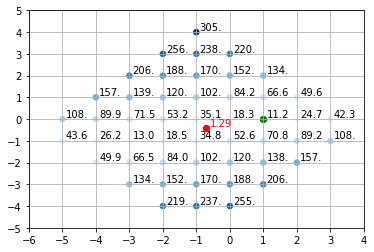

In [91]:
plot_nearest_norms(lc_cube, lc_LLL, B, neighborhood=5)

### Testing the descent algorithm


True


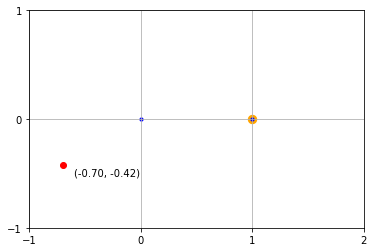

In [92]:
reached, pathway = descent_single(case)
plot_pathway(pathway,reached)

### Plot norm function


In [118]:
%run case_study_tools.ipynb
plot_norm_function(G, lc_cube, lc_LLL)

lccube: [1.00000000000000, -0.697577476501465, -0.4217753410339356]
lcLLL: [1.00000000000000, 1.00000000000000, 0.000000000000000]
x:  (1, x_2, x_3)
Deleted index:  0  (python indexing)
[  334  -277  1082]
[ -277   346 -1229]
[ 1082 -1229  4598]


<IPython.core.display.Math object>

Graphics3d Object

In [119]:
G_multiplied, num = matrix_multiplication_detailed(G, [1,1,1])
G_multiplied, num = matrix_multiplication_detailed(G, lc_cube)

print(G_multiplied)
print(num)

[  334.0  193.23 -456.36]
[ 193.23  168.37  -361.6]
[-456.36  -361.6  817.96]
